In [142]:
import pandas as pd

data = {
    "ontology": [0.03993391990661621, 0.08662986755371094, 0.07849383354187012],
    "ah": [24.676761865615845, 26.81848120689392, 27.245759963989258],
    "er": [144.4293179512024, 148.95185589790344, 157.85572981834412],
    "gr": [57.92736101150513, 58.04327702522278, 63.89013075828552],
    "iw": [125.51392006874084, 127.08702683448792, 133.3230299949646],
    "kl": [30.138803958892822, 30.36555290222168, 32.33726096153259],
    "ly": [10.755175828933716, 10.815240859985352, 11.117337942123413],
    "dict": [15.00589895248413, 15.032188892364502, 15.226519107818604],
    "total": [408.49302983283997, 417.221351146698, 441.0959107875824]
}

df = pd.DataFrame(data=data)

In [143]:
df[df.columns.drop("total")].apply(sum, axis=1)

0    408.487174
1    417.200253
2    441.074262
dtype: float64

In [144]:
df.index = ["trial"+str(i) for i in range(len(df.index))]
df

,ah,dict,er,gr,iw,kl,ly,ontology,total
trial0,24.676762,15.005899,144.429318,57.927361,125.513920,30.138804,10.755176,0.039934,408.493030
trial1,26.818481,15.032189,148.951856,58.043277,127.087027,30.365553,10.815241,0.086630,417.221351
trial2,27.245760,15.226519,157.855730,63.890131,133.323030,32.337261,11.117338,0.078494,441.095911


In [145]:
df.mean(axis=0).apply(lambda x: "%.2f seconds" % x)

ah           26.25 seconds
dict         15.09 seconds
er          150.41 seconds
gr           59.95 seconds
iw          128.64 seconds
kl           30.95 seconds
ly           10.90 seconds
ontology      0.07 seconds
total       422.27 seconds
dtype: object

In [146]:
df.loc["mean"] = df.mean(axis=0)

In [147]:
df

,ah,dict,er,gr,iw,kl,ly,ontology,total
trial0,24.676762,15.005899,144.429318,57.927361,125.513920,30.138804,10.755176,0.039934,408.493030
trial1,26.818481,15.032189,148.951856,58.043277,127.087027,30.365553,10.815241,0.086630,417.221351
trial2,27.245760,15.226519,157.855730,63.890131,133.323030,32.337261,11.117338,0.078494,441.095911
mean,26.247001,15.088202,150.412301,59.953590,128.641326,30.947206,10.895918,0.068353,422.270097


In [153]:
# wc -l ah.nt er.nt gr.nt iw.nt kl.nt ly.nt dict.nt ontology.nt
data = """  142584 ah.nt
  847892 er.nt
  334647 gr.nt
  732150 iw.nt
  172492 kl.nt
   59225 ly.nt
   77318 dict.nt
     182 ontology.nt
 2366490 total"""

row = {}
for item in [l.strip().split(" ") for l in data.split("\n")]:
    num_triples, name = item
    if name.endswith(".nt"):
        name = name[:-3]
    row[name] = int(num_triples)
#df.add(axis=1, pd.Series(row))
df = df.append(pd.Series(row, name="triples"))

In [158]:
df

,ah,dict,er,gr,iw,kl,ly,ontology,total
trial0,24.676762,15.005899,144.429318,57.927361,125.513920,30.138804,10.755176,0.039934,4.084930e+02
trial1,26.818481,15.032189,148.951856,58.043277,127.087027,30.365553,10.815241,0.086630,4.172214e+02
trial2,27.245760,15.226519,157.855730,63.890131,133.323030,32.337261,11.117338,0.078494,4.410959e+02
mean,26.247001,15.088202,150.412301,59.953590,128.641326,30.947206,10.895918,0.068353,4.222701e+02
triples,142584.000000,77318.000000,847892.000000,334647.000000,732150.000000,172492.000000,59225.000000,182.000000,2.366490e+06


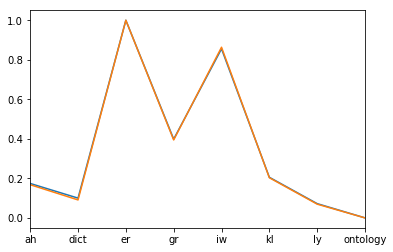

In [188]:
%matplotlib inline
ax = (df.loc["mean", "ah":"ontology"]/df.loc["mean", "ah":"ontology"].max()).plot(kind="line")
(df.loc["triples", "ah":"ontology"]/df.loc["triples", "ah":"ontology"].max()).plot(kind="line", ax=ax)
# there is literally no scalability problem for this size of data

In [313]:
# random numbers for evaluation
import random
import requests
import json

verse_numbers = {
    "ah": 1520,
    "er": 10135,
    "gr": 4006,
    "iw": 8166,
    "kl": 1914
}

# hva:lineInText hva:msA hva:msB hva:msBa hva:msBb hva:msC hva:msD hva:msE hva:msF hva:msFvS hva:msG hva:msK hva:msV hva:msW hva:msZ hva:note hva:text hva:translation hva:verseNumber
test_verses = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>
PREFIX data: <http://www.ebusiness-unibw.org/ontologies/hva/%s#>

ask
where {
  ?verse_uri a hva:Verse .
  ?verse_uri hva:lineInText ?line .
  #?verse_uri hva:note ?note_uri . # optional
  ?verse_uri hva:text ?text .
  #?verse_uri hva:translation ?translation . # not available - only available for words
  ?verse_uri hva:verseNumber ?vnum .
  ?verse_uri rdfs:isDefinedBy data:Ontology .
  # foaf:img and foaf:page links
  FILTER(str(?vnum) = "%s")
}
"""

# hva:entry hva:grammar hva:lemma hva:partOfVerse hva:positionInVerse hva:text hva:translation hva:word
test_words = """
PREFIX hva: <http://www.ebusiness-unibw.org/ontologies/hva/ontology#>
PREFIX data: <http://www.ebusiness-unibw.org/ontologies/hva/%s#>

ask
where {
  ?word_uri a hva:Word .
  #?word_uri hva:entry ?entry . # used only if word part of dictentry
  ?word_uri hva:grammar ?grammar .
  ?word_uri hva:lemma ?lemma .
  ?word_uri hva:partOfVerse ?verse_uri .
  ?verse_uri hva:verseNumber ?vnum .
  ?word_uri hva:positionInVerse ?pos .
  #?word_uri hva:text ?text . # not used in datasets
  ?word_uri hva:translation ?translation .
  ?word_uri hva:word ?word .
  ?word_uri rdfs:isDefinedBy data:Ontology .
  FILTER(str(?vnum) = "%s")
}
"""

random.seed(a=1)
for poem, limit in verse_numbers.items():
    random_numbers = sorted(random.sample(k=10, population=range(verse_numbers[poem])))
    print (poem, random_numbers)
    for number in random_numbers:
        query_string = test_verses % (poem, number)
        #print (query_string)
        r = requests.post(url="http://tools.ebusiness-unibw.org:9090/sparql", data={"query": query_string}, headers={"Accept": "application/sparql-results+json"})
        assert(json.loads(r.text)["boolean"] == True)
        query_string = test_words % (poem, number)
        #print (query_string)
        r = requests.post(url="http://tools.ebusiness-unibw.org:9090/sparql", data={"query": query_string}, headers={"Accept": "application/sparql-results+json"})
        assert(json.loads(r.text)["boolean"] == True)
print("Evaluation successful!")

ah [129, 241, 275, 522, 777, 920, 967, 1014, 1165, 1334]
er [34, 464, 1537, 3439, 4363, 6386, 7090, 7297, 7993, 9952]
gr [91, 125, 418, 937, 1300, 2421, 2955, 3284, 3692, 3871]
iw [75, 208, 1774, 3122, 4435, 5321, 5623, 7219, 7693, 7938]
kl [59, 454, 477, 864, 896, 1015, 1080, 1132, 1486, 1564]
Evaluation successful!
